# Visualisation

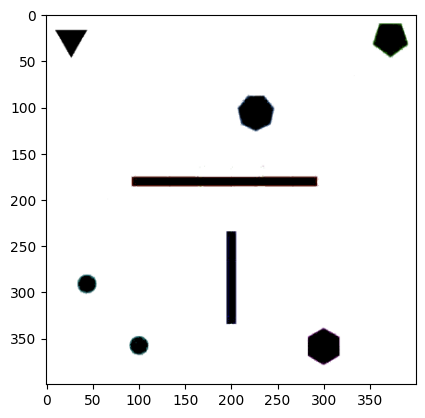

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('graphics/world_test.png')
im_out_world = cv.resize(img, (400, 400))
plt.imshow(im_out_world)
plt.show()

def get_Kappa_coefficient(img1, img2):
	if img1.shape != img2.shape:
		print("Images must have the same size")
		return
	l, w, _ = img1.shape
	TN = 0
	TP = 0
	FN = 0
	FP = 0
	unmatched = 0
	for i in range(l):
		for j in range(w):
			if img1[i, j].any() != 0: # empty
				if img2[i, j, 0] == 255 and img2[i, j, 1] == 255 and img2[i, j, 2] == 255: # empty
					TP += 1
				elif img2[i, j, 0] == 0 and img2[i, j, 1] == 0 and img2[i, j, 2] == 255: # corrosion
					FP += 1
				else:
					unmatched += 1
			elif img1[i, j].all() == 0: # corrosion
				if img2[i, j, 0] == 255 and img2[i, j, 1] == 255 and img2[i, j, 2] == 255: # empty
					FN += 1
				elif img2[i, j, 0] == 0 and img2[i, j, 1] == 0 and img2[i, j, 2] == 255: # corrosion
					TN += 1
				else:
					unmatched += 1
			else:
				unmatched += 1
	print("TP: ", TP, "TN: ", TN, "FP: ", FP, "FN: ", FN, "Unmatched: ", unmatched)
	f_c = ((TN + FN) * (TN + FP) + (FP + TP) * (FN + TP)) / (TP + TN + FN +FP)
	kappa = (TP + TN - f_c) / ((TP + TN + FN + FP) - f_c)
	return kappa, unmatched

## Peinture au Rouleau

### velocity=0.3, distance=4.0, overlap=0.1, 1 receiver

TP:  147801 TN:  3796 FP:  2558 FN:  388 Unmatched:  5457
Kappa score:  0.7110051022586613


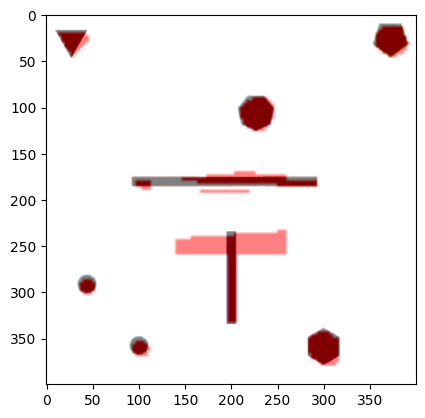

In [3]:
# peinture = cv.imread('graphics/d=2.0_o=0.1_v=0.2.png')
peinture = cv.imread('graphics/occupancy_grid_invest.png')
im_out_peinture = cv.resize(peinture, (400, 400))
kappa, _ = get_Kappa_coefficient(im_out_world, im_out_peinture)
print("Kappa score: ", kappa)
im_out_peinture = cv.cvtColor(im_out_peinture, cv.COLOR_BGR2RGB)
both = cv.addWeighted(im_out_world, 0.5, im_out_peinture, 0.5, 0)
plt.imshow(both)
plt.show()

### velocity=0.3, distance=2.0, overlap=0.1, 1 receiver

TP:  158049 TN:  898 FP:  723 FN:  330 Unmatched:  0
Kappa score:  0.6271401795176628


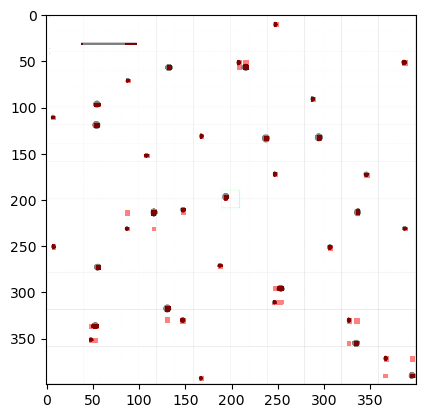

In [9]:
peinture = cv.imread('graphics/velocity=0.3_distance=2.0_overlap=0.1.png')
im_out_peinture = cv.resize(peinture, (400, 400))
kappa, _ = get_Kappa_coefficient(im_out_world, im_out_peinture)
print("Kappa score: ", kappa)
im_out_peinture = cv.cvtColor(im_out_peinture, cv.COLOR_BGR2RGB)
both = cv.addWeighted(im_out_world, 0.5, im_out_peinture, 0.5, 0)
plt.imshow(both)
plt.show()

### velocity=0.3, distance=1.0, overlap=0.1, 1 receiver

TP:  158303 TN:  891 FP:  469 FN:  337 Unmatched:  0
Kappa score:  0.6860299697248763


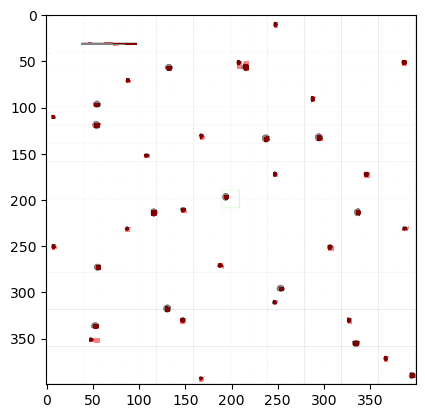

In [10]:
peinture = cv.imread('graphics/velocity=0.3_distance=1.0_overlap=0.1.png')
im_out_peinture = cv.resize(peinture, (400, 400))
kappa, _ = get_Kappa_coefficient(im_out_world, im_out_peinture)
print("Kappa score: ", kappa)
im_out_peinture = cv.cvtColor(im_out_peinture, cv.COLOR_BGR2RGB)
both = cv.addWeighted(im_out_world, 0.5, im_out_peinture, 0.5, 0)
plt.imshow(both)
plt.show()

## Ski Nordique